In [7]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

irisDF = pd.DataFrame(data=iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [9]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [10]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


target 1, 2가 cluster 0,2에 분산되어있음

2차원으로 시각화하기 위해 PCA로 차원축소

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


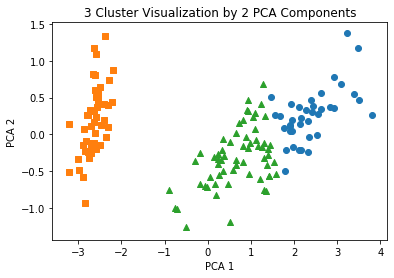

In [12]:
# cluster 0, 1, 2별  index 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

## Creating Data for Clustering Algorithm Test 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

print(X)

(200, 2) (200,)
[0 1 2] [67 67 66]
[[-1.69242695  3.62202539]
 [ 0.69794036  4.4288665 ]
 [ 1.10022802  4.60631734]
 [-1.44872404  3.38424521]
 [ 1.21486062  5.36489604]
 [-0.90830163  1.97077775]
 [ 2.47211942  0.43703328]
 [ 1.65684156  2.4412893 ]
 [ 1.07779975  4.62537882]
 [-1.67942681  2.60200265]
 [ 0.65372852  5.28174338]
 [-0.97188549  2.79022351]
 [ 1.58510026  4.40112734]
 [ 1.29307545  3.42933812]
 [ 0.25043139  4.34534364]
 [-1.07307179  2.73974218]
 [ 2.68432989  0.52452838]
 [ 2.16883005  0.64220093]
 [ 0.32575305  2.92276125]
 [-3.15145159  4.56947655]
 [-1.06408682  3.19760583]
 [ 1.45946366  0.23651283]
 [ 1.01287689  4.15404025]
 [ 1.73407165  4.17977925]
 [-3.3313554   2.09987679]
 [-0.3148482   4.1335951 ]
 [ 1.5403728  -0.88105886]
 [-2.13821915  1.76764908]
 [-0.84056487  3.83076375]
 [-1.57620513  2.83203804]
 [ 1.34880003  3.07479238]
 [ 0.9846701   5.73248372]
 [-1.56064117  2.68837251]
 [ 0.64537489  3.70582348]
 [ 1.40457611 -0.2754758 ]
 [ 2.47438034  0.968

In [16]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


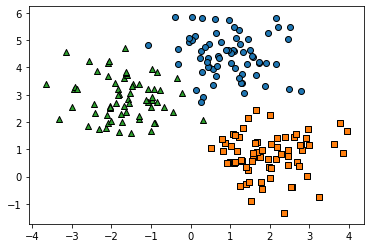

In [17]:
target_list = np.unique(y)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# target 0, 1, 2, scatter plot
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()

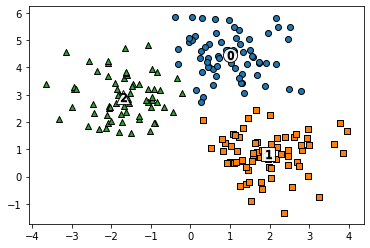

In [18]:
# K-means로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [19]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64
